In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') # sns에 흰색 그리드 유지
import missingno # 결측치 시각화

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Input
from keras.models import Model

# 자연어 처리
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
from keras.datasets import mnist

In [3]:
# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# MNIST 데이터를 불러온다.
(X_train, _), (X_test,_) = mnist.load_data()

In [5]:
# 데이터 표준화 작업
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [6]:
# 모델 생성
model = Sequential()

In [7]:
# 인코딩 부분
model.add(Conv2D(16, kernel_size=3, padding='same', 
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(8, kernel_size=3, strides=2, padding='same', 
                 activation='relu'))

In [8]:
# 디코딩 부분
model.add(Conv2D(8, kernel_size = 3, padding='same', activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [9]:
# 전체 구조 확인 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [10]:
# 컴파일한다.
model.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
# 학습
model.fit(X_train, X_train, validation_data=(X_test, X_test),
         epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 8s 9ms/step - loss: 0.3019 - val_loss: 0.1394
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1327 - val_loss: 0.1174
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1154 - val_loss: 0.1091
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1083 - val_loss: 0.1035
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1044 - val_loss: 0.1008
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1014 - val_loss: 0.0990
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0975
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0962 - val_loss: 0.0942
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0954 - val_loss: 0.0930

In [12]:
# 랜덤하게 5개의 이미지를 추출한다.
random_test = np.random.randint(X_test.shape[0], size=5)

# 예측 이미지 생성
ae_imgs = model.predict(X_test)

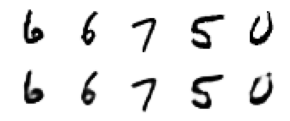

In [13]:
# 출력될 이미지의 크기
plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2,7,i+1)
    # 원본
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    
    ax = plt.subplot(2,7,7+i+1)
    # 오토인코딩 결과
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()